In [1]:
import pandas as pd
import numpy as np
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# 1. Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

data = pd.read_csv('ccpp.csv')
data = data.apply(lambda x: x.str.replace(',','.'))

data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.5,1009.23,96.62,473.9
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [7]:
x = data.iloc[:, :4].to_numpy().astype(np.float32)
y = data.iloc[:, 4].to_numpy().astype(np.float32)


y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28], dtype=float32)

In [32]:


x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.33, shuffle=False)

test_size = (x_test.shape[0]/x.shape[0])
print(test_size)
val_size = (x_val.shape[0]/x.shape[0])
print(val_size)
train_size = (x_train.shape[0]/x.shape[0])
print(train_size)

x_val.shape

0.10002090301003344
0.2970317725752508
0.6029473244147158


(2842, 4)

In [27]:
# 2. Постройте регрессионную модель.  Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.

model = SVR(kernel='linear')

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

mean_absolute_error(y_val, y_pred), r2_score(y_val, y_pred)

(3.670196938236351, 0.9240563031728759)

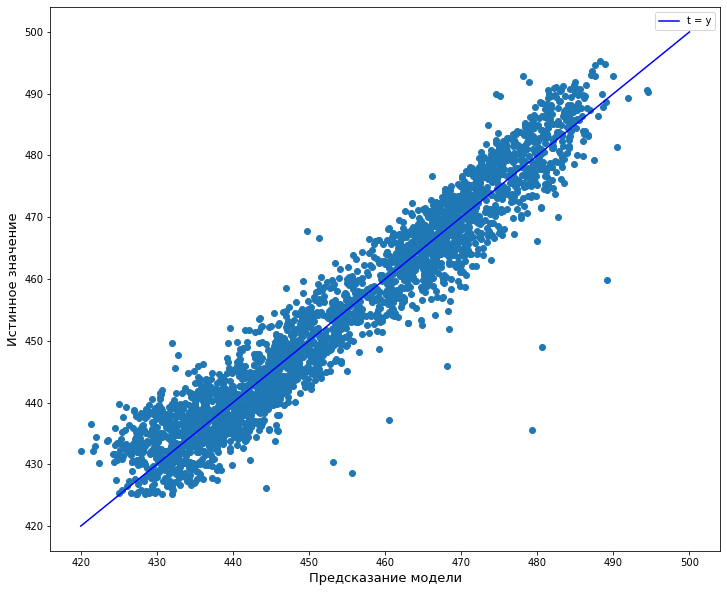

In [42]:
# 3. Постройте точки из валидационной выборки на плоскости (t=истинное значение, 
# y=предсказание модели). Отобразите вместе с ними прямую y=t.

plt.figure(figsize=(12, 10))
plt.xlabel("Предсказание модели", fontsize=13)
plt.ylabel("Истинное значение", fontsize=13)
plt.plot([420, 500], [420, 500], c='b', label='t = y')
plt.scatter(y_pred, y_val)
plt.legend()
plt.show()

In [39]:
# 5. Замерьте  и повторите п. 3. на тестовой выборке.

y_pred_test = model.predict(x_test)

mean_absolute_error(y_test, y_pred_test), r2_score(y_test, y_pred_test)

(3.6493917809652734, 0.9273799620753401)

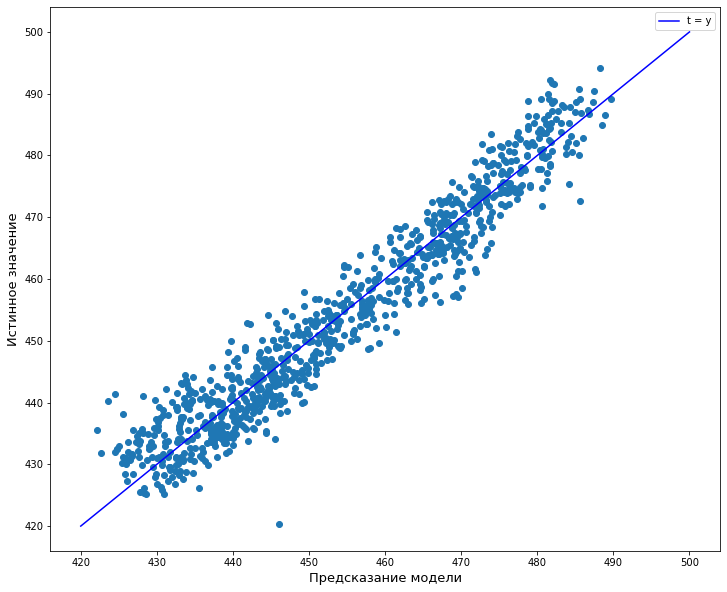

In [43]:
plt.figure(figsize=(12, 10))
plt.xlabel("Предсказание модели", fontsize=13)
plt.ylabel("Истинное значение", fontsize=13)
plt.plot([420, 500], [420, 500], c='b', label='t = y')
plt.scatter(y_pred_test, y_test)
plt.legend()
plt.show()